In [0]:
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [29]:
from google.colab import drive
drive.mount('/content/drive')
project_path = "/content/drive/My Drive/LinearRegression/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
adm_df = pd.read_csv(project_path + 'Advertising.csv')

In [31]:
adm_df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [0]:
adm_df = adm_df[["TV", "Radio", "Newspaper", "Sales"]]

In [33]:
adm_df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


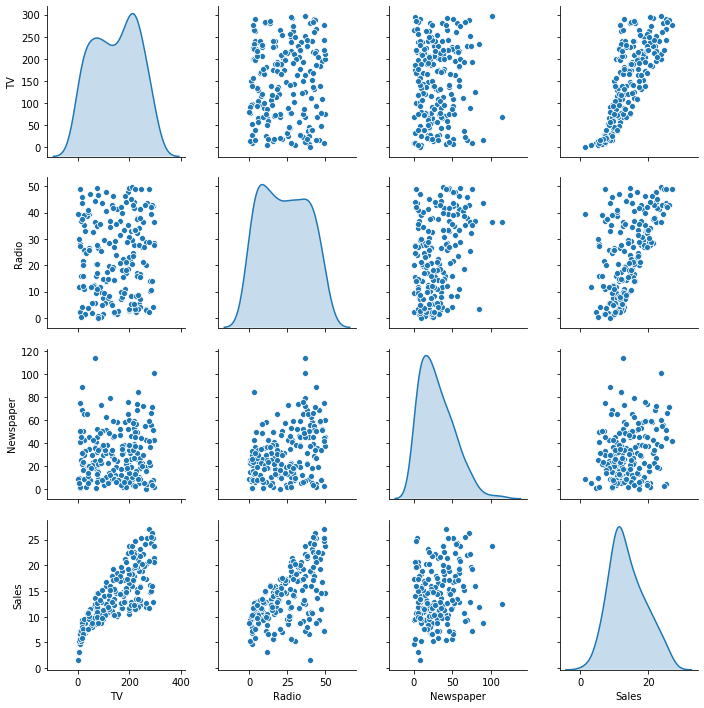

In [34]:
sns.pairplot(adm_df, diag_kind='kde')

In [35]:
adm_df.TV.corr(adm_df.Sales)

0.7822244248616061

In [0]:
#Predict Sales for ads in TV

In [0]:
X = adm_df[["TV"]]
y = adm_df[["Sales"]]

In [38]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
intercept = lr.intercept_[0]
intercept

7.032593549127695

In [40]:
coef = lr.coef_[0][0]
coef

0.04753664043301975

Sales = beta_0 + beta_1 * TV

Sales = intercept_ + coef_ * TV
Sales = 7.032 + 0.0475 * TV

Suppose TV = 150 . Predict Sales?

In [41]:
TV = 150
Sales = intercept + coef * TV
Sales

14.163089614080658

We can also use inbuilt function for prediction

In [42]:
newData = {"TV": [150, 200, 250]}
newData = pd.DataFrame(data=newData)
lr.predict(newData)

array([[14.16308961],
       [16.53992164],
       [18.91675366]])

Calculate accuracy of the built model

In [0]:
model = lr.fit(X, y)

In [48]:
intercept = model.intercept_[0]
intercept

7.032593549127695

In [51]:
coef = model.coef_[0][0]
coef

0.04753664043301975

In [56]:
SalesPredictions = model.predict(X)
SalesPredictions[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [57]:
y[0:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Calculate root mean sequare error: RMSE

In [0]:
from sklearn import metrics

In [60]:
#MSE
metrics.mean_squared_error(SalesPredictions, y)

10.512652915656757

In [61]:
#RMSE
np.sqrt(metrics.mean_squared_error(SalesPredictions, y))

3.2423221486546887

In [62]:
avgSales = np.mean(y)
avgSales

Sales    14.0225
dtype: float64

R^2 caluclation

In [63]:
model.score(X, y)

0.611875050850071